# Decision Tree Classifier with Employee Attrition Dataset

In this notebook, we will build a decision tree classifier using the scikit-learn library. We will use a hypothetical employee attrition dataset for this example.

## Import Libraries
First, let's import the necessary libraries.

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

## Load and Explore the Dataset
Next, we will load the employee attrition dataset ('employee_attrition_small.csv') and explore its contents.

In [26]:
df = pd.read_csv('employee_attrition_small.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,Gender,HourlyRate,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,TotalWorkingYears
0,41,Yes,Travel_Rarely,1102,Sales,Life Sciences,Female,94,Sales Executive,4,Single,5993,19479,8,Yes,8
1,49,No,Travel_Frequently,279,Research & Development,Life Sciences,Male,61,Research Scientist,2,Married,5130,24907,1,No,10
2,37,Yes,Travel_Rarely,1373,Research & Development,Other,Male,92,Laboratory Technician,3,Single,2090,2396,6,Yes,7
3,33,No,Travel_Frequently,1392,Research & Development,Life Sciences,Female,56,Research Scientist,3,Married,2909,23159,1,Yes,8
4,27,No,Travel_Rarely,591,Research & Development,Medical,Male,40,Laboratory Technician,2,Married,3468,16632,9,No,6


## Preprocess the Data
We need to preprocess the data, including handling categorical variables and missing values.

In [33]:
print(df.isnull().sum())

y=df['Attrition']
X = df.drop(columns=['Attrition'])
from sklearn.calibration import LabelEncoder
le=LabelEncoder()

for col in X.columns:
    if X[col].dtype=='object':
        X[col] = le.fit_transform(X[col])
X.head()

Age                   0
Attrition             0
BusinessTravel        0
DailyRate             0
Department            0
EducationField        0
Gender                0
HourlyRate            0
JobRole               0
JobSatisfaction       0
MaritalStatus         0
MonthlyIncome         0
MonthlyRate           0
NumCompaniesWorked    0
OverTime              0
TotalWorkingYears     0
dtype: int64


,Age,BusinessTravel,DailyRate,Department,EducationField,Gender,HourlyRate,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,TotalWorkingYears
0,41,2,1102,2,1,0,94,7,4,2,5993,19479,8,1,8
1,49,1,279,1,1,1,61,6,2,1,5130,24907,1,0,10
2,37,2,1373,1,4,1,92,2,3,2,2090,2396,6,1,7
3,33,1,1392,1,1,0,56,6,3,1,2909,23159,1,1,8
4,27,2,591,1,3,1,40,2,2,1,3468,16632,9,0,6


## Split the Dataset
We will split the dataset into training and testing sets.

In [28]:
# drop the outcome column
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# Split the dataset into training and testing sets
print(x_train.shape,y_train.shape)

(1176, 29) (1176,)


## Train and evaluate the Decision Tree Model
## Please not that the maximum depth shouldn't be greater than 3

In [29]:
# Create and train the decision tree classifier
dt = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10, random_state=42)
dt.fit(x_train,y_train)
# Make predictions on the test set
y_pred_dt=dt.predict(x_test)
print(y_pred_dt)
# Calculate the accuracy of the decision tree model
accuracy_dt = accuracy_score(y_test,y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No

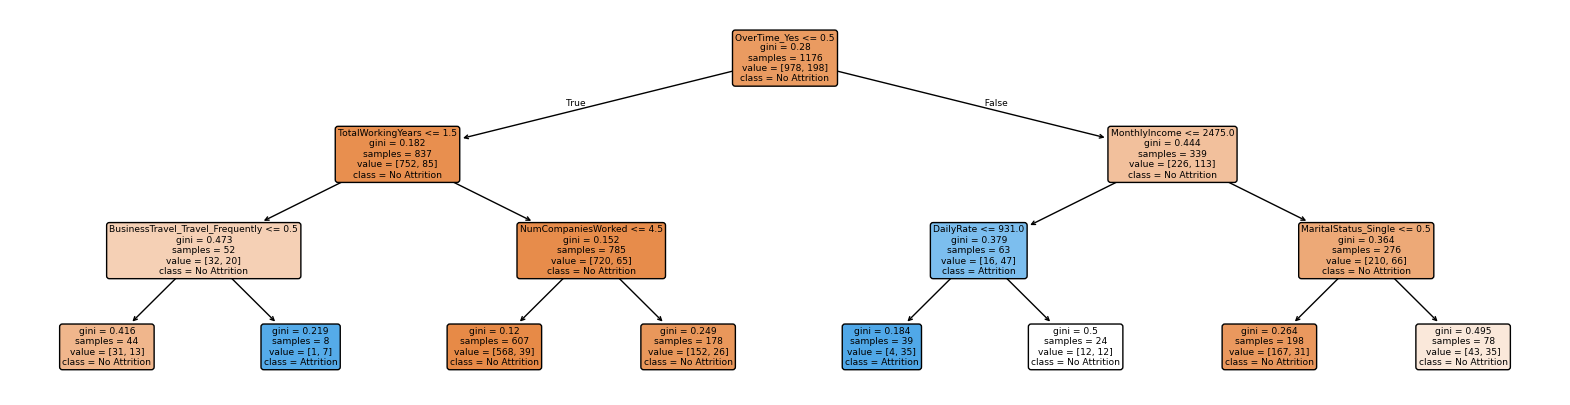

In [30]:
plt.figure(figsize=(20,5))
plot_tree(dt,feature_names=x_train.columns,
          class_names=['No Attrition','Attrition'],filled=True,rounded=True)
plt.show()